# Particle Swarm Optimization Based FeedForward Neural Network

Evolutionary Computing is an Artificial Intelligence field that focus in algorithms inspired by nature. Such algorithms are used in complex artificial intelligence and optimization problems that cannot be efficiently solved by tradicional mathematical programming methods. In this project, we will create a feedforward neural network that will use the particle swarm optimization algorithm as its optimizer. In order to demonstrate the functionality, the algorithm will be applied in a simple classification problem: Iris (https://archive.ics.uci.edu/ml/datasets/iris)


## Iris Dataset

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

### Attribute Information:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
- class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica


## 1. Importing Library and Data

In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


data = load_iris()

X = data.data
y = data.target

## 2. Feature Engineering

To improve the Neural Network performance, let's normalize the data between 0-1, using MinMaxScaler.

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. FeedForward Neural Network and Particle Swarm Optimization

The feedforward neural network developed can be found in the **neural.py** file. It consists of:

- Input Layer
- Hidden Layer 1 (Tanh Activation Function)
- Dropout Layer (If Necessary)
- Hidden Layer 2 (Tanh Activation Function)
- Output Layer (Softmax Activation Function)
- Negative Log-Likelihood Loss Function
- Regularization (L1)


The Particle Swarm Optimization Algorithm simulates the flocks of birds behavior in nature. Each vector is a particle (bird) and contains all the neural network weights and biases. All values are initialized randomly in a Normal Gaussian Distribution (mean = 0, [-1,1]). This particles fly around the optimization hyperspace using information of other particles and its own experience (cognitive and social components). It consists of:

- Linearly Decreasing Inertia Weight (Controls the exploration and exploitation)
- C1 (Social Component Constant)
- C2 (Cognitive Component Constant)
- WMAX and WMIN (Maximum and Minimum Value of Inertia Weight)

All particles are evaluated according to the fitness function, that is:

$Fitness = Loss + \frac{1}{\theta} \frac{\sum{|w|}}{n}$

$w$ - neural newtork weights

$\theta$ - regularization strenght factor

$n$ - number of weights

The code can be found in the file: **particle_swarm_optimization.py**


#### References and Further Explanations: Computational Intelligence: An Introduction - Autor: Andries P. Engelbrecht

In [3]:
from neural import neural_network
from particle_swarm_optimization import PSO_optimizer

nn = neural_network(n_hidden_layer=2, n_neurons_hl1=24, n_neurons_hl2=12, n_input=4, n_output=3, dropout_prob=0, regularization_factor = 5e3)

nn.architecture()

results = PSO_optimizer(X_train, X_test, y_train, y_test, nn, c1=2, c2=0.25, wmin=0.4, wmax=0.9, max_iter = 500, n_particles = 100, verbose=True)


FeedForward Neural Network developed by Rafael Pavan 

Architecture: 

- 2 Hidden Layers; 

- Hidden Layer 1: 24 neurons, activation function: tanh; 

- Hidden Layer 2: 12 neurons, activation function: tanh; 

- Output: 3 neurons, activation function: softmax; 

- Loss Function:  Negative Log-Likelihood Loss; 

- Dropout Probability: 0 

- Regularization: L1, 5000.0 


----------
Iteration 25
Train Fitness (Loss+Regularization): 0.4749910807601874
Test Fitness (Loss+Regularization): 0.5751019216681033
Train Accuracy: 86.66666666666667
Test Accuracy: 73.33333333333333

----------
Iteration 50
Train Fitness (Loss+Regularization): 0.39269723606057716
Test Fitness (Loss+Regularization): 0.4176513441237081
Train Accuracy: 90.83333333333333
Test Accuracy: 83.33333333333334

----------
Iteration 75
Train Fitness (Loss+Regularization): 0.3883740179409617
Test Fitness (Loss+Regularization): 0.37580228135681676
Train Accuracy: 94.16666666666667
Test Accuracy: 90.0

----------
Iteration 100
Train

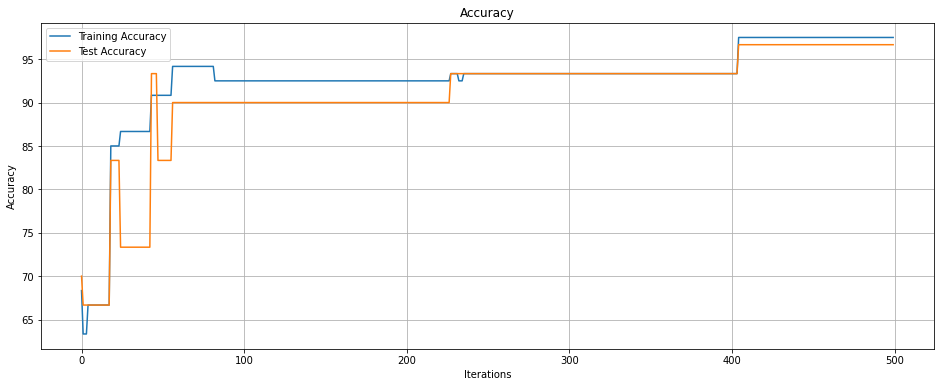

In [12]:
plt.figure(figsize=(16,6))
plt.plot(results['train_acc'], label="Training Accuracy")
plt.plot(results['test_acc'], label="Test Accuracy")
plt.grid()
plt.title("Accuracy")
plt.xlabel("Iterations")
plt.ylabel('Accuracy')
plt.legend()